In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

https://www.kaggle.com/code/nroman/melanoma-pytorch-starter-efficientnet/data
https://www.kaggle.com/datasets/wanderdust/skin-lesion-analysis-toward-melanoma-detection
https://www.kaggle.com/code/abhishek/melanoma-detection-with-pytorch
https://www.kaggle.com/competitions/siim-isic-melanoma-classification/data используем эти данные

https://www.kaggle.com/datasets/drscarlat/melanoma

In [3]:
df = pd.read_csv('train.csv')
df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [4]:
df.tail()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0
33125,ISIC_9999806,IP_0046310,male,45.0,torso,nevus,benign,0


In [5]:
df.describe()

,age_approx,target
count,33058.000000,33126.000000
mean,48.870016,0.017630
std,14.380360,0.131603
min,0.000000,0.000000
25%,40.000000,0.000000
50%,50.000000,0.000000
75%,60.000000,0.000000
max,90.000000,1.000000


In [6]:
df.dtypes

image_name                        object
patient_id                        object
sex                               object
age_approx                       float64
anatom_site_general_challenge     object
diagnosis                         object
benign_malignant                  object
target                             int64
dtype: object

In [7]:
df.columns

Index(['image_name', 'patient_id', 'sex', 'age_approx',
       'anatom_site_general_challenge', 'diagnosis', 'benign_malignant',
       'target'],
      dtype='object')

In [8]:
df.isna().sum()

image_name                         0
patient_id                         0
sex                               65
age_approx                        68
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
dtype: int64

In [9]:
df.isna().mean()*100

image_name                       0.000000
patient_id                       0.000000
sex                              0.196220
age_approx                       0.205277
anatom_site_general_challenge    1.590895
diagnosis                        0.000000
benign_malignant                 0.000000
target                           0.000000
dtype: float64

In [10]:
import missingno as msno 

<AxesSubplot:>

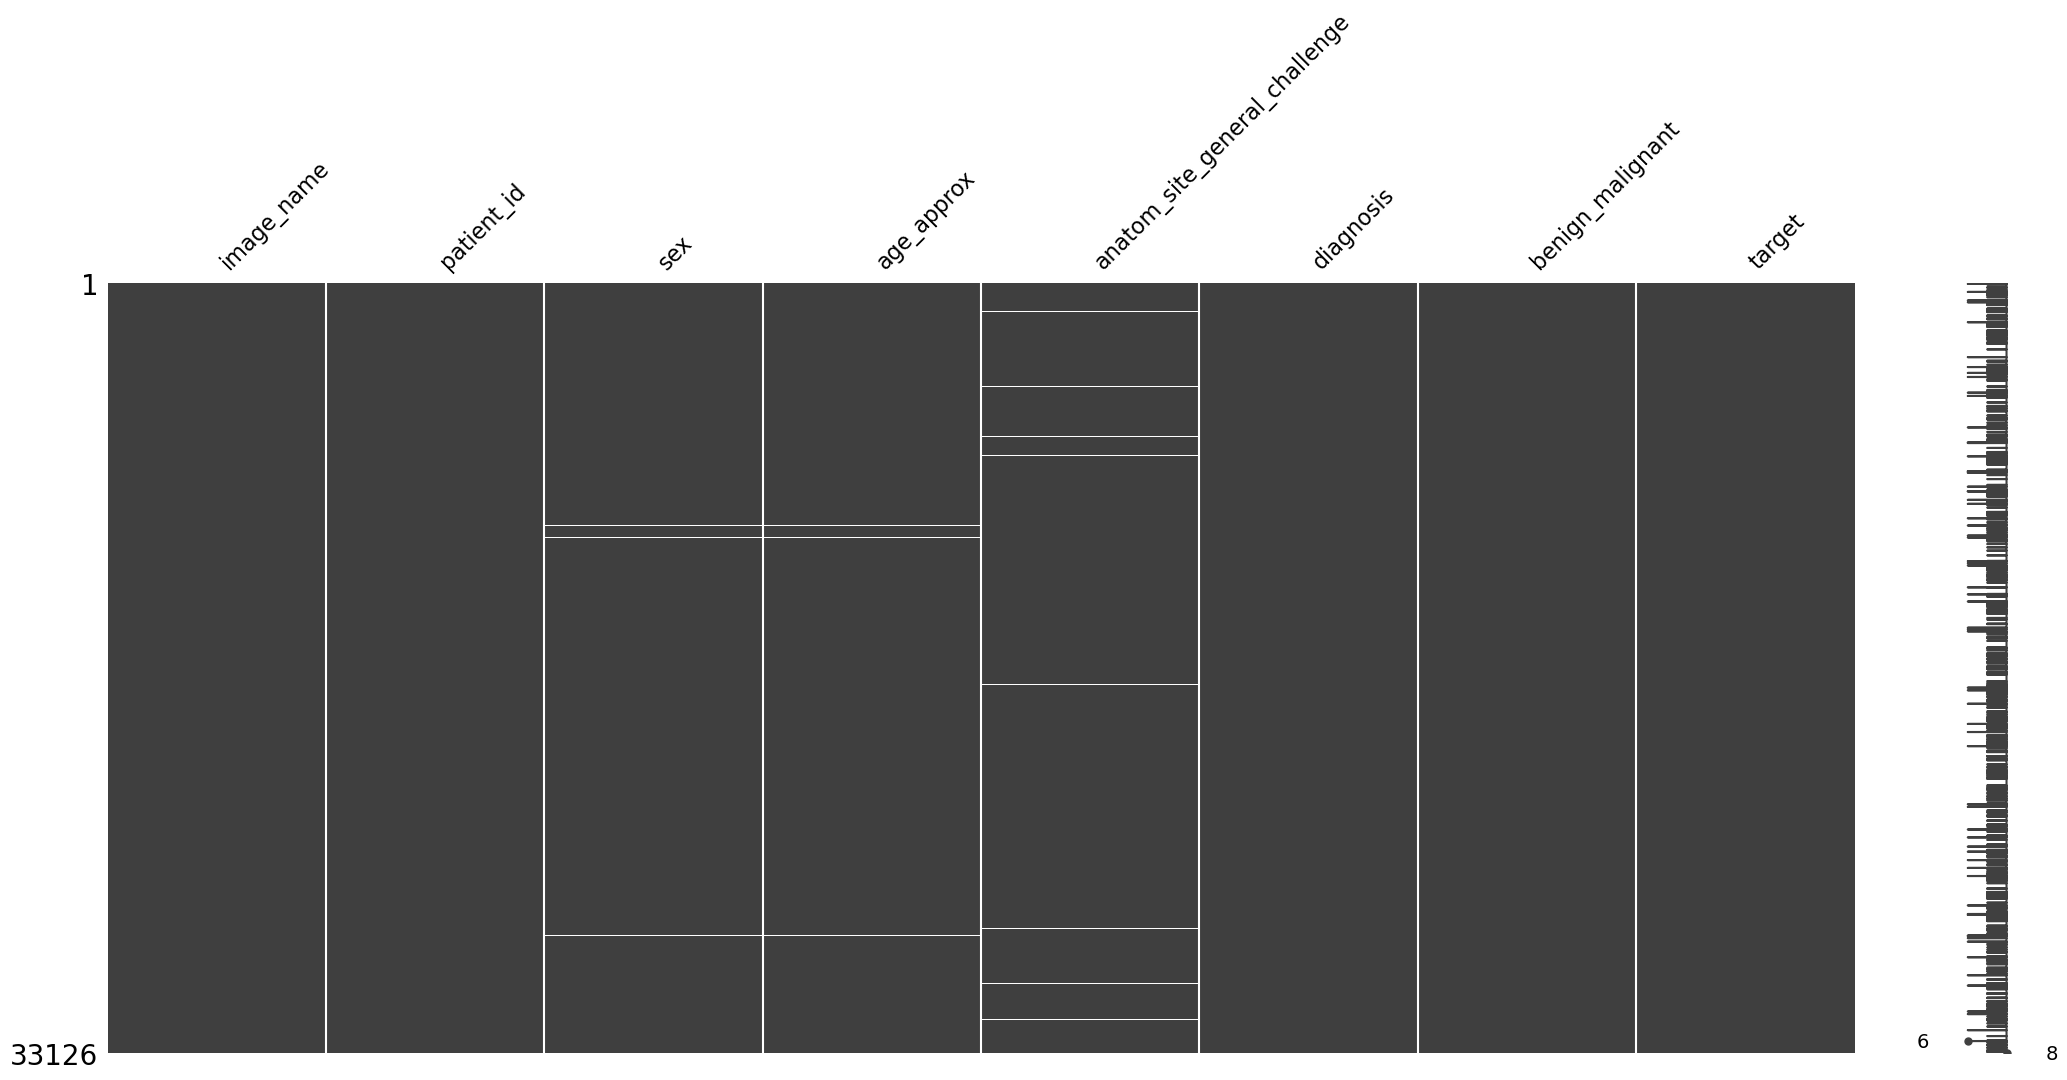

In [11]:
msno.matrix(df)

<AxesSubplot:>

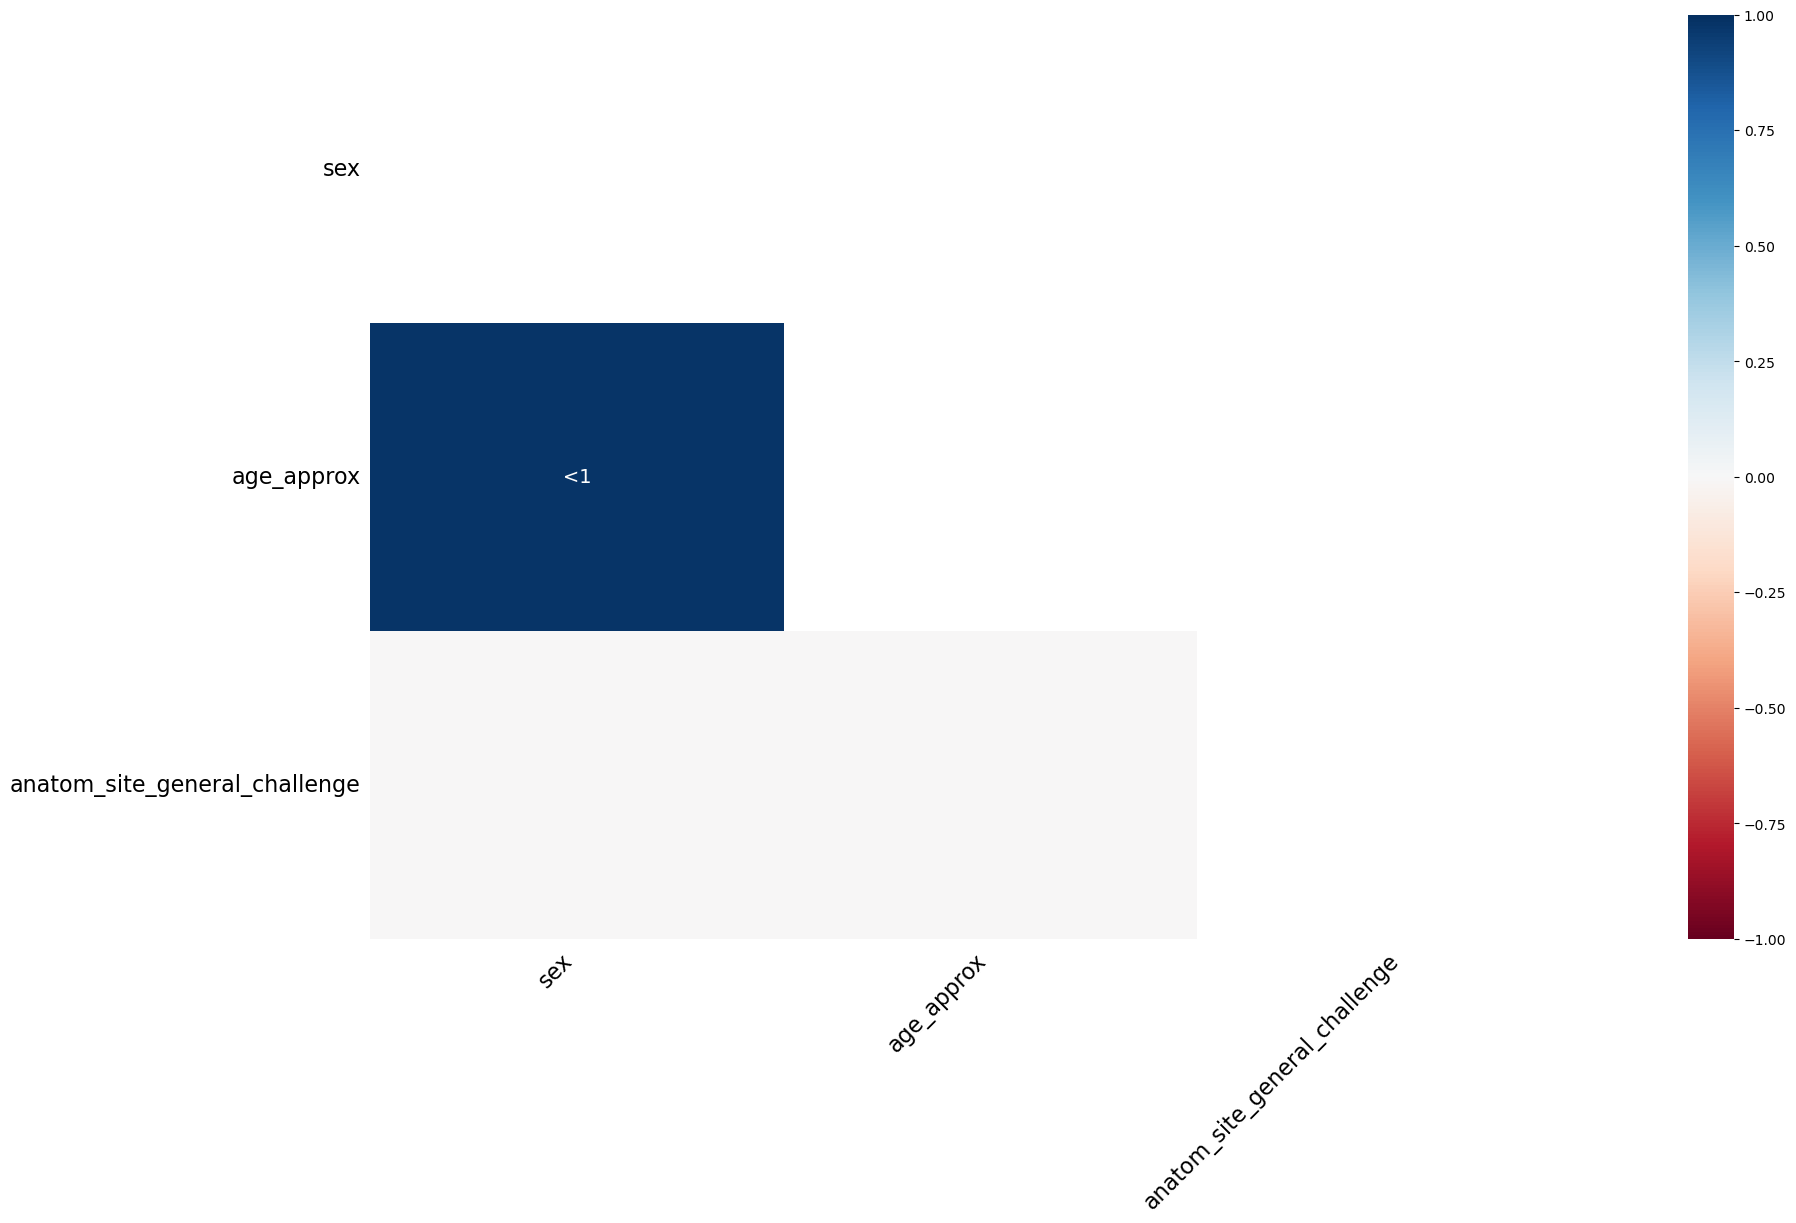

In [12]:
msno.heatmap(df)

In [13]:
df['sex'].isna().value_counts()

False    33061
True        65
Name: sex, dtype: int64

In [14]:
df['age_approx'].isna().value_counts()

False    33058
True        68
Name: age_approx, dtype: int64

In [15]:
df['anatom_site_general_challenge'].isna().value_counts()

False    32599
True       527
Name: anatom_site_general_challenge, dtype: int64

In [16]:
df['sex'].value_counts()

male      17080
female    15981
Name: sex, dtype: int64

In [17]:
df['anatom_site_general_challenge'].value_counts()

torso              16845
lower extremity     8417
upper extremity     4983
head/neck           1855
palms/soles          375
oral/genital         124
Name: anatom_site_general_challenge, dtype: int64

In [18]:
df['diagnosis'].value_counts()

unknown                               27124
nevus                                  5193
melanoma                                584
seborrheic keratosis                    135
lentigo NOS                              44
lichenoid keratosis                      37
solar lentigo                             7
cafe-au-lait macule                       1
atypical melanocytic proliferation        1
Name: diagnosis, dtype: int64

In [19]:
df['benign_malignant'].value_counts()

benign       32542
malignant      584
Name: benign_malignant, dtype: int64

In [20]:
df.index.duplicated().sum() #нет дублей

0

In [21]:
df.groupby(['sex']).mean()

,age_approx,target
sex,,
female,47.237139,0.013766
male,50.397541,0.021311


array([[<AxesSubplot:title={'center':'age_approx'}>,
        <AxesSubplot:title={'center':'target'}>]], dtype=object)

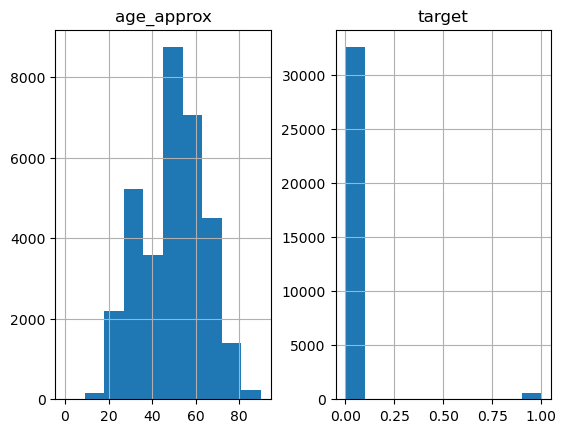

In [22]:
df.hist()

<AxesSubplot:>

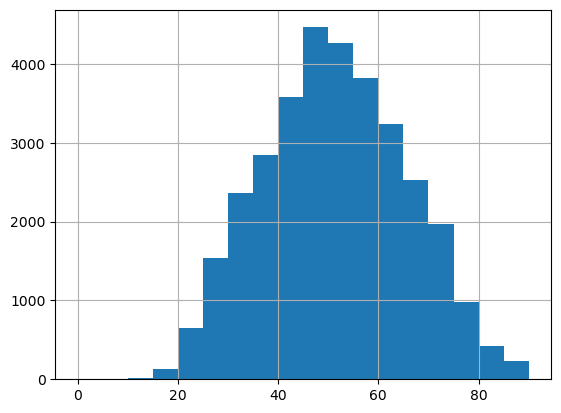

In [23]:
df['age_approx'].hist(bins = 18)

<AxesSubplot:>

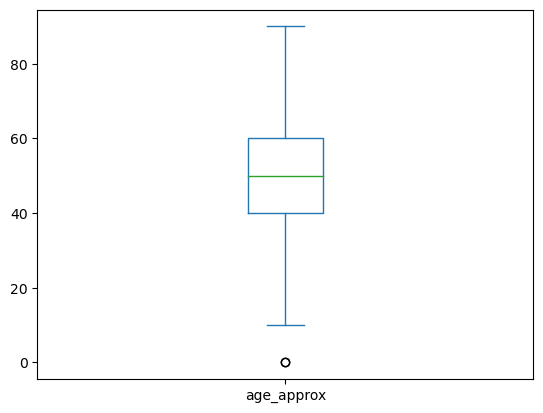

In [24]:
df['age_approx'].plot.box()

In [25]:
df = df.dropna() # в текущей таблице оставили только непустые и вернули индекс!

In [26]:
df.reset_index(drop = True, inplace = True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32531 entries, 0 to 32530
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     32531 non-null  object 
 1   patient_id                     32531 non-null  object 
 2   sex                            32531 non-null  object 
 3   age_approx                     32531 non-null  float64
 4   anatom_site_general_challenge  32531 non-null  object 
 5   diagnosis                      32531 non-null  object 
 6   benign_malignant               32531 non-null  object 
 7   target                         32531 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ MB


array([[<AxesSubplot:xlabel='age_approx', ylabel='age_approx'>]],
      dtype=object)

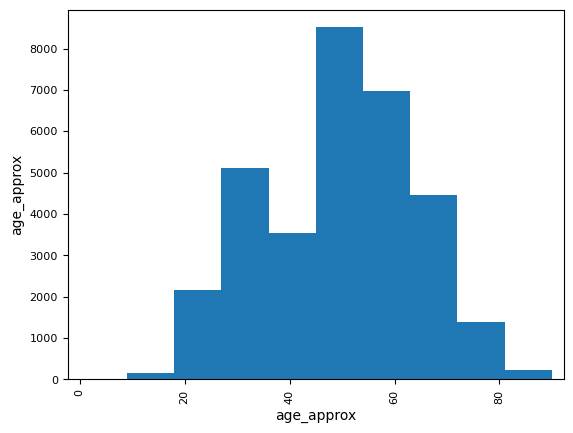

In [28]:
pd.plotting.scatter_matrix(df[['sex', 'age_approx', 'anatom_site_general_challenge', 'diagnosis', 'benign_malignant']])

In [29]:
df[df['diagnosis'] == 'melanoma'].target.sum()

575

In [30]:
df.target.sum()

575

In [31]:
df_new = df[['image_name', 'age_approx', 'target']]

In [32]:
df_new.head()

,image_name,age_approx,target
0,ISIC_2637011,45.0,0
1,ISIC_0015719,45.0,0
2,ISIC_0052212,50.0,0
3,ISIC_0068279,45.0,0
4,ISIC_0074268,55.0,0


In [33]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [34]:
OneHotEncoder??

In [35]:
onehotenc = OneHotEncoder(dtype = np.int64)

In [36]:
df_enc = pd.DataFrame(onehotenc.fit_transform(df[['sex', 'anatom_site_general_challenge']]).toarray(), \
                      columns = list(onehotenc.categories_[0]) + list(onehotenc.categories_[1]))

In [37]:
list(onehotenc.categories_[0]) + list(onehotenc.categories_[1])

['female',
 'male',
 'head/neck',
 'lower extremity',
 'oral/genital',
 'palms/soles',
 'torso',
 'upper extremity']

In [38]:
df_new.index

RangeIndex(start=0, stop=32531, step=1)

In [39]:
df_enc.index

RangeIndex(start=0, stop=32531, step=1)

In [40]:
onehotenc.get_feature_names_out()

array(['sex_female', 'sex_male',
       'anatom_site_general_challenge_head/neck',
       'anatom_site_general_challenge_lower extremity',
       'anatom_site_general_challenge_oral/genital',
       'anatom_site_general_challenge_palms/soles',
       'anatom_site_general_challenge_torso',
       'anatom_site_general_challenge_upper extremity'], dtype=object)

In [41]:
pd.concat??

In [42]:
df_ready = pd.concat([df_new, df_enc], axis = 1)
df_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32531 entries, 0 to 32530
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   image_name       32531 non-null  object 
 1   age_approx       32531 non-null  float64
 2   target           32531 non-null  int64  
 3   female           32531 non-null  int64  
 4   male             32531 non-null  int64  
 5   head/neck        32531 non-null  int64  
 6   lower extremity  32531 non-null  int64  
 7   oral/genital     32531 non-null  int64  
 8   palms/soles      32531 non-null  int64  
 9   torso            32531 non-null  int64  
 10  upper extremity  32531 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 2.7+ MB


In [42]:
df_ready

,image_name,age_approx,target,female,male,head/neck,lower extremity,oral/genital,palms/soles,torso,upper extremity
0,ISIC_2637011,45.0,0,0,1,1,0,0,0,0,0
1,ISIC_0015719,45.0,0,1,0,0,0,0,0,0,1
2,ISIC_0052212,50.0,0,1,0,0,1,0,0,0,0
3,ISIC_0068279,45.0,0,1,0,1,0,0,0,0,0
4,ISIC_0074268,55.0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
32526,ISIC_9999134,50.0,0,0,1,0,0,0,0,1,0
32527,ISIC_9999320,65.0,0,0,1,0,0,0,0,1,0
32528,ISIC_9999515,20.0,0,0,1,0,1,0,0,0,0
32529,ISIC_9999666,50.0,0,0,1,0,1,0,0,0,0


# 2 Пути решения

1) Решаем только с изображениями и target

2) Решаем, внося на этапе обучения столбцы

полом;
расположением;
пол + расположение


In [43]:
Добавить возраст

SyntaxError: invalid syntax (3340103896.py, line 1)